In [1]:
from importlib import reload
from tqdm import tqdm
import HateSpeechAggregator as hsa
from glob import glob
import json

reload(hsa);


files = glob('../clean-data/comments/*.csv')
files.sort()

with open('../../hsle/src/_current_data_.json') as f:
  data = json.load(f)
  daterange =data['daterange']

f.close() 

for f in tqdm(files):
    split_file = str(f).split('/')[3]
    date_file=split_file.split(".")[0]
    if date_file==daterange:
        file_check =glob(f)
        hsa.run(file_check)

/home/curiousgirl/Public/Desktop/hate-speech-new/hsle/modules/CrowdTangleExportCommentsTools/CrowdTangleExportCommentsTools/HsleCandidateGenerationUtils.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLN.web_clean(l) for l in tmp.label_alternative_spelling]
  0%|          | 0/20 [00:00<?, ?it/s]/home/curiousgirl/Public/Desktop/hate-speech-new/dashboard/src/HateSpeechAggregator.py:214: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime(


Current date range: 20200706 20200709
Processing: 20200706_20200709.csv


/home/curiousgirl/Public/Desktop/hate-speech-new/dashboard/src/HateSpeechAggregator.py:95: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  comment_df['date'] = [pd.datetime(d.year, d.month, d.day) for d in comment_df.datetime]
/home/curiousgirl/Public/Desktop/hate-speech-new/dashboard/src/HateSpeechAggregator.py:123: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  for d in lex_topic_page_time_df.DateTime]


Writing 1818 lines...
Done.
Writing 170 lines...
Done.
Writing 4 lines...
Done.


100%|██████████| 20/20 [00:01<00:00, 14.83it/s]

Writing 4 lines...
Done.
Writing 170 lines...
Done.


## Calculate X2

In [2]:
from scipy.stats import chi2_contingency
import pandas as pd
from glob import glob

aggredate_id = str(max([int(f.split('/')[-1]) for f in glob('../../dashboard/clean-data/aggregated/*')]))
print(aggredate_id)
print('###############', aggredate_id)
print(
    chi2_contingency(pd.read_csv(
        '../clean-data/aggregated/'+aggredate_id+'/hspost-effect.csv', sep='~').groupby(
            ['post_has_lex','comment_has_lex'])['count'].sum().unstack())[:3],
    '\n',
    chi2_contingency(pd.read_csv(
        '../clean-data/aggregated/'+aggredate_id+'/hsfirst-comment-effect.csv', sep='~').groupby(
            ['first_comment_has_lex','reply_has_lex'])['count'].sum().unstack())[:3]
)

20200715030318
############### 20200715030318
(114.37089441686905, 1.0807880111310106e-26, 1) 
 (83.47357967020228, 6.457323898287198e-20, 1)


## Calculate Coorelation between #HS-#UniqueAccounts

In [3]:
df1 = pd.read_csv('../clean-data/aggregated/'+aggredate_id+'/lex-topic-page-time.csv', sep='~')
df1['key'] = ['{}-{}'.format(a,b) for a,b in zip(df1.Page, df1.Date)]
display(df1.head(2))

df2 = pd.read_csv('../clean-data/aggregated/'+aggredate_id+'/page-reach.csv', sep='~')
df2['key'] = ['{}-{}'.format(a,b) for a,b in zip(df2.page_group_name, df2.date)]
display(df2.head(2))

,Profile ID,Name,Hate Speech Phrase,Topic,Page,DateTime,Hour,Date,ISOWeek,key
0,100045415926472,UThan,အကြမ်းဖက်,AA,Unicef Myanmar,2020-07-08 10:52:23,10,2020-07-08,2020-07-08,Unicef Myanmar-2020-07-08
1,100050628121548,အမေ မာ,အကြမ်းဖက်,AA,Unicef Myanmar,2020-07-08 14:00:13,14,2020-07-08,2020-07-08,Unicef Myanmar-2020-07-08


,page_group_name,date,count,key
0,7Day News Journal,2020-07-06,933,7Day News Journal-2020-07-06
1,7Day News Journal,2020-07-07,501,7Day News Journal-2020-07-07


In [4]:
df = df1.merge(df2, how='left', on='key').loc[:, ['Page','Topic','Date','count','Profile ID']]
print(df.shape)
df.head(2)

(1818, 5)


,Page,Topic,Date,count,Profile ID
0,Unicef Myanmar,AA,2020-07-08,58,100045415926472
1,Unicef Myanmar,AA,2020-07-08,58,100050628121548


In [5]:
x = df1.groupby('Page')['Page'].count()
x.name = 'hs'
y = df2.groupby('page_group_name')['count'].sum()
y.name = 'ua'

In [6]:
z = pd.DataFrame([x,y]).T.fillna(0)

[None, None]

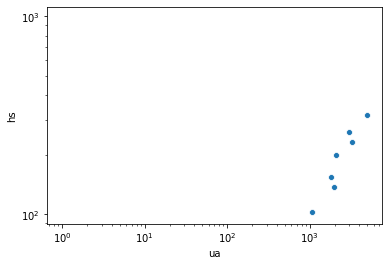

In [7]:
import seaborn as sns

ax = sns.scatterplot(x='ua', y='hs', data=z)
ax.set(xscale="log", yscale="log")